In [1]:
import sys 
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Dropout
from sklearn.metrics import mean_squared_error
from keras.models import Model
from mylibrary import plot_ssp, creatMas, my_cross_val_score

Using TensorFlow backend.


In [3]:
ocean = 'BarentsSea'

In [4]:
with open('{0}/CZ.txt'.format(ocean), 'r') as f:
    line = f.readlines()
CZ=creatMas(line)
with open('{0}/zs.txt'.format(ocean), 'r') as f:
    line = f.readlines()
    line = line[:-1]
zs = [-int(a) for a in line]
N_cord=len(zs)

In [22]:
CZ_train, CZ_test = train_test_split(CZ)
CZ_train.shape, CZ_test.shape

((112, 12), (38, 12))

In [23]:
def AEncoder(input_dim, latent_dim):
    hidden_layer = int(input_dim * 0.8)
    
    inputs = Input(shape=(input_dim,))
    inp_layar1 = Dense(hidden_layer, activation='softplus',kernel_initializer='he_normal')(inputs)
    #np_layar1 = Dropout(0.1)(inp_layar1)
    
    encoded = Dense(latent_dim, activation='softplus', kernel_initializer='he_normal')(inp_layar1)
    
    dec_lay = Dense(hidden_layer,activation='linear', kernel_initializer='he_normal')(encoded)
    #dec_lay = Dropout(0.1)(dec_lay)
    decoded = Dense(input_dim,activation='linear', kernel_initializer='he_normal')(dec_lay)
    
    autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)
    
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

## Обучение на сырых данных

In [24]:
hidden_layer = int(N_cord*0.8)
autoencoder, encoder = AEncoder(N_cord, 5)

In [25]:
hist = autoencoder.fit(CZ_train, CZ_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test, CZ_test))

Train on 112 samples, validate on 38 samples
Epoch 1/200
112/112 [==============================] - 0s 4ms/step - loss: 7380745.0714 - val_loss: 7139422.5000
Epoch 2/200
112/112 [==============================] - 0s 45us/step - loss: 7067180.6429 - val_loss: 6816180.0000
Epoch 3/200
112/112 [==============================] - 0s 45us/step - loss: 6751243.6429 - val_loss: 6519529.0000
Epoch 4/200
112/112 [==============================] - 0s 36us/step - loss: 6455908.2143 - val_loss: 6235995.0000
Epoch 5/200
112/112 [==============================] - 0s 45us/step - loss: 6176818.8571 - val_loss: 5971564.0000
Epoch 6/200
112/112 [==============================] - 0s 45us/step - loss: 5916335.7857 - val_loss: 5725380.0000
Epoch 7/200
112/112 [==============================] - 0s 45us/step - loss: 5673963.2143 - val_loss: 5496350.5000
Epoch 8/200
112/112 [==============================] - 0s 45us/step - loss: 5448505.1429 - val_loss: 5283233.5000
Epoch 9/200
112/112 [=======================

112/112 [==============================] - 0s 45us/step - loss: 1070866.7321 - val_loss: 1044522.1875
Epoch 72/200
112/112 [==============================] - 0s 45us/step - loss: 1036831.1429 - val_loss: 1010724.8125
Epoch 73/200
112/112 [==============================] - 0s 45us/step - loss: 1003080.5982 - val_loss: 977190.7500
Epoch 74/200
112/112 [==============================] - 0s 45us/step - loss: 969626.6161 - val_loss: 944001.6875
Epoch 75/200
112/112 [==============================] - 0s 36us/step - loss: 936543.7054 - val_loss: 911243.3750
Epoch 76/200
112/112 [==============================] - 0s 54us/step - loss: 903909.2946 - val_loss: 878912.8125
Epoch 77/200
112/112 [==============================] - 0s 54us/step - loss: 871678.9286 - val_loss: 847029.1875
Epoch 78/200
112/112 [==============================] - 0s 36us/step - loss: 839905.2768 - val_loss: 815636.1875
Epoch 79/200
112/112 [==============================] - 0s 45us/step - loss: 808629.1161 - val_loss: 784

112/112 [==============================] - 0s 45us/step - loss: 10147.4404 - val_loss: 9417.8984
Epoch 144/200
112/112 [==============================] - 0s 54us/step - loss: 9259.7819 - val_loss: 8592.5518
Epoch 145/200
112/112 [==============================] - 0s 45us/step - loss: 8450.2486 - val_loss: 7840.3428
Epoch 146/200
112/112 [==============================] - 0s 36us/step - loss: 7712.4832 - val_loss: 7155.1128
Epoch 147/200
112/112 [==============================] - 0s 36us/step - loss: 7040.3654 - val_loss: 6531.1284
Epoch 148/200
112/112 [==============================] - 0s 36us/step - loss: 6428.2396 - val_loss: 5963.0972
Epoch 149/200
112/112 [==============================] - 0s 36us/step - loss: 5871.0390 - val_loss: 5446.1250
Epoch 150/200
112/112 [==============================] - 0s 45us/step - loss: 5363.9560 - val_loss: 4975.6938
Epoch 151/200
112/112 [==============================] - 0s 36us/step - loss: 4902.3140 - val_loss: 4547.6914
Epoch 152/200
112/112 [

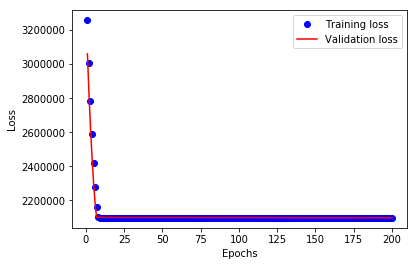

In [79]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

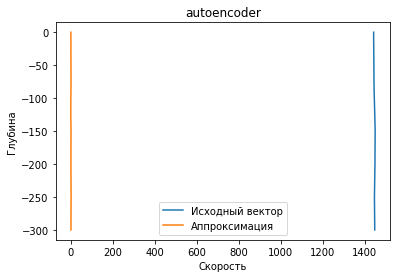

In [80]:
n = 7
test = CZ_test[n]
predict = autoencoder.predict(CZ_test[n:n+1])
plot_ssp(test, predict[0], zs, 'autoencoder')
plt.show()

## С использованием нормировки данных

In [29]:
scaler = StandardScaler()
CZ_train_std = scaler.fit_transform(CZ_train)
CZ_test_std = scaler.transform(CZ_test)

In [30]:
autoencoder_std, encoder_std = AEncoder(N_cord, 3)

In [31]:
CZ_train_std.shape

(112, 12)

In [32]:
hist = autoencoder_std.fit(CZ_train_std, CZ_train_std,
                epochs=1000,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test_std, CZ_test_std))

Train on 112 samples, validate on 38 samples
Epoch 1/1000
112/112 [==============================] - 1s 5ms/step - loss: 20.1225 - val_loss: 23.3439
Epoch 2/1000
112/112 [==============================] - 0s 36us/step - loss: 19.0608 - val_loss: 21.9983
Epoch 3/1000
112/112 [==============================] - 0s 36us/step - loss: 17.8955 - val_loss: 20.7366
Epoch 4/1000
112/112 [==============================] - 0s 36us/step - loss: 16.9450 - val_loss: 19.5359
Epoch 5/1000
112/112 [==============================] - 0s 45us/step - loss: 15.9683 - val_loss: 18.4086
Epoch 6/1000
112/112 [==============================] - 0s 45us/step - loss: 15.0111 - val_loss: 17.3547
Epoch 7/1000
112/112 [==============================] - 0s 71us/step - loss: 14.2139 - val_loss: 16.3602
Epoch 8/1000
112/112 [==============================] - 0s 45us/step - loss: 13.3286 - val_loss: 15.4406
Epoch 9/1000
112/112 [==============================] - 0s 45us/step - loss: 12.6412 - val_loss: 14.5711
Epoch 10/10

112/112 [==============================] - 0s 36us/step - loss: 1.4554 - val_loss: 1.6327
Epoch 80/1000
112/112 [==============================] - 0s 27us/step - loss: 1.4382 - val_loss: 1.6129
Epoch 81/1000
112/112 [==============================] - 0s 45us/step - loss: 1.4231 - val_loss: 1.5937
Epoch 82/1000
112/112 [==============================] - 0s 45us/step - loss: 1.4070 - val_loss: 1.5754
Epoch 83/1000
112/112 [==============================] - 0s 36us/step - loss: 1.3922 - val_loss: 1.5578
Epoch 84/1000
112/112 [==============================] - 0s 45us/step - loss: 1.3779 - val_loss: 1.5409
Epoch 85/1000
112/112 [==============================] - 0s 45us/step - loss: 1.3648 - val_loss: 1.5247
Epoch 86/1000
112/112 [==============================] - 0s 45us/step - loss: 1.3507 - val_loss: 1.5093
Epoch 87/1000
112/112 [==============================] - 0s 45us/step - loss: 1.3379 - val_loss: 1.4945
Epoch 88/1000
112/112 [==============================] - 0s 27us/step - loss: 

112/112 [==============================] - 0s 45us/step - loss: 0.9513 - val_loss: 1.0474
Epoch 158/1000
112/112 [==============================] - 0s 45us/step - loss: 0.9484 - val_loss: 1.0439
Epoch 159/1000
112/112 [==============================] - 0s 54us/step - loss: 0.9454 - val_loss: 1.0404
Epoch 160/1000
112/112 [==============================] - 0s 45us/step - loss: 0.9426 - val_loss: 1.0369
Epoch 161/1000
112/112 [==============================] - 0s 45us/step - loss: 0.9397 - val_loss: 1.0335
Epoch 162/1000
112/112 [==============================] - 0s 45us/step - loss: 0.9367 - val_loss: 1.0300
Epoch 163/1000
112/112 [==============================] - 0s 71us/step - loss: 0.9339 - val_loss: 1.0266
Epoch 164/1000
112/112 [==============================] - 0s 45us/step - loss: 0.9310 - val_loss: 1.0232
Epoch 165/1000
112/112 [==============================] - 0s 62us/step - loss: 0.9282 - val_loss: 1.0197
Epoch 166/1000
112/112 [==============================] - 0s 45us/step

Epoch 235/1000
112/112 [==============================] - 0s 45us/step - loss: 0.7254 - val_loss: 0.7713
Epoch 236/1000
112/112 [==============================] - 0s 45us/step - loss: 0.7224 - val_loss: 0.7674
Epoch 237/1000
112/112 [==============================] - 0s 45us/step - loss: 0.7192 - val_loss: 0.7635
Epoch 238/1000
112/112 [==============================] - 0s 45us/step - loss: 0.7161 - val_loss: 0.7596
Epoch 239/1000
112/112 [==============================] - 0s 36us/step - loss: 0.7129 - val_loss: 0.7557
Epoch 240/1000
112/112 [==============================] - 0s 54us/step - loss: 0.7097 - val_loss: 0.7518
Epoch 241/1000
112/112 [==============================] - 0s 45us/step - loss: 0.7066 - val_loss: 0.7480
Epoch 242/1000
112/112 [==============================] - 0s 36us/step - loss: 0.7034 - val_loss: 0.7441
Epoch 243/1000
112/112 [==============================] - 0s 45us/step - loss: 0.7001 - val_loss: 0.7402
Epoch 244/1000
112/112 [==============================]

112/112 [==============================] - 0s 45us/step - loss: 0.4860 - val_loss: 0.4835
Epoch 313/1000
112/112 [==============================] - 0s 36us/step - loss: 0.4831 - val_loss: 0.4803
Epoch 314/1000
112/112 [==============================] - 0s 36us/step - loss: 0.4806 - val_loss: 0.4770
Epoch 315/1000
112/112 [==============================] - 0s 45us/step - loss: 0.4778 - val_loss: 0.4738
Epoch 316/1000
112/112 [==============================] - 0s 54us/step - loss: 0.4750 - val_loss: 0.4706
Epoch 317/1000
112/112 [==============================] - 0s 54us/step - loss: 0.4721 - val_loss: 0.4675
Epoch 318/1000
112/112 [==============================] - 0s 36us/step - loss: 0.4696 - val_loss: 0.4643
Epoch 319/1000
112/112 [==============================] - 0s 36us/step - loss: 0.4669 - val_loss: 0.4612
Epoch 320/1000
112/112 [==============================] - 0s 45us/step - loss: 0.4642 - val_loss: 0.4581
Epoch 321/1000
112/112 [==============================] - 0s 54us/step

112/112 [==============================] - 0s 36us/step - loss: 0.3251 - val_loss: 0.2968
Epoch 390/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3238 - val_loss: 0.2952
Epoch 391/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3224 - val_loss: 0.2935
Epoch 392/1000
112/112 [==============================] - 0s 45us/step - loss: 0.3209 - val_loss: 0.2919
Epoch 393/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3196 - val_loss: 0.2903
Epoch 394/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3182 - val_loss: 0.2888
Epoch 395/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3169 - val_loss: 0.2873
Epoch 396/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3156 - val_loss: 0.2858
Epoch 397/1000
112/112 [==============================] - 0s 36us/step - loss: 0.3142 - val_loss: 0.2843
Epoch 398/1000
112/112 [==============================] - 0s 36us/step

112/112 [==============================] - 0s 36us/step - loss: 0.2511 - val_loss: 0.2113
Epoch 468/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2505 - val_loss: 0.2106
Epoch 469/1000
112/112 [==============================] - 0s 27us/step - loss: 0.2499 - val_loss: 0.2099
Epoch 470/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2494 - val_loss: 0.2092
Epoch 471/1000
112/112 [==============================] - 0s 45us/step - loss: 0.2488 - val_loss: 0.2084
Epoch 472/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2482 - val_loss: 0.2078
Epoch 473/1000
112/112 [==============================] - 0s 27us/step - loss: 0.2477 - val_loss: 0.2071
Epoch 474/1000
112/112 [==============================] - 0s 27us/step - loss: 0.2471 - val_loss: 0.2065
Epoch 475/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2465 - val_loss: 0.2058
Epoch 476/1000
112/112 [==============================] - 0s 62us/step

Epoch 545/1000
112/112 [==============================] - 0s 45us/step - loss: 0.2185 - val_loss: 0.1745
Epoch 546/1000
112/112 [==============================] - 0s 45us/step - loss: 0.2182 - val_loss: 0.1742
Epoch 547/1000
112/112 [==============================] - 0s 45us/step - loss: 0.2179 - val_loss: 0.1739
Epoch 548/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2176 - val_loss: 0.1736
Epoch 549/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2173 - val_loss: 0.1733
Epoch 550/1000
112/112 [==============================] - 0s 36us/step - loss: 0.2170 - val_loss: 0.1730
Epoch 551/1000
112/112 [==============================] - 0s 45us/step - loss: 0.2167 - val_loss: 0.1727
Epoch 552/1000
112/112 [==============================] - 0s 62us/step - loss: 0.2164 - val_loss: 0.1724
Epoch 553/1000
112/112 [==============================] - 0s 45us/step - loss: 0.2162 - val_loss: 0.1721
Epoch 554/1000
112/112 [==============================]

112/112 [==============================] - 0s 36us/step - loss: 0.1998 - val_loss: 0.1561
Epoch 624/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1996 - val_loss: 0.1559
Epoch 625/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1994 - val_loss: 0.1557
Epoch 626/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1992 - val_loss: 0.1555
Epoch 627/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1990 - val_loss: 0.1554
Epoch 628/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1988 - val_loss: 0.1552
Epoch 629/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1986 - val_loss: 0.1550
Epoch 630/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1984 - val_loss: 0.1548
Epoch 631/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1982 - val_loss: 0.1546
Epoch 632/1000
112/112 [==============================] - 0s 45us/step

112/112 [==============================] - 0s 45us/step - loss: 0.1861 - val_loss: 0.1443
Epoch 702/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1859 - val_loss: 0.1441
Epoch 703/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1857 - val_loss: 0.1440
Epoch 704/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1856 - val_loss: 0.1439
Epoch 705/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1854 - val_loss: 0.1437
Epoch 706/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1853 - val_loss: 0.1436
Epoch 707/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1851 - val_loss: 0.1435
Epoch 708/1000
112/112 [==============================] - 0s 54us/step - loss: 0.1850 - val_loss: 0.1433
Epoch 709/1000
112/112 [==============================] - 0s 54us/step - loss: 0.1848 - val_loss: 0.1432
Epoch 710/1000
112/112 [==============================] - 0s 71us/step

112/112 [==============================] - 0s 45us/step - loss: 0.1746 - val_loss: 0.1348
Epoch 780/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1745 - val_loss: 0.1347
Epoch 781/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1744 - val_loss: 0.1346
Epoch 782/1000
112/112 [==============================] - 0s 54us/step - loss: 0.1742 - val_loss: 0.1345
Epoch 783/1000
112/112 [==============================] - 0s 62us/step - loss: 0.1741 - val_loss: 0.1344
Epoch 784/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1740 - val_loss: 0.1343
Epoch 785/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1738 - val_loss: 0.1342
Epoch 786/1000
112/112 [==============================] - 0s 54us/step - loss: 0.1737 - val_loss: 0.1341
Epoch 787/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1736 - val_loss: 0.1340
Epoch 788/1000
112/112 [==============================] - 0s 36us/step

112/112 [==============================] - 0s 36us/step - loss: 0.1646 - val_loss: 0.1267
Epoch 858/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1644 - val_loss: 0.1266
Epoch 859/1000
112/112 [==============================] - 0s 54us/step - loss: 0.1643 - val_loss: 0.1265
Epoch 860/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1642 - val_loss: 0.1264
Epoch 861/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1641 - val_loss: 0.1263
Epoch 862/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1640 - val_loss: 0.1263
Epoch 863/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1638 - val_loss: 0.1262
Epoch 864/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1637 - val_loss: 0.1261
Epoch 865/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1636 - val_loss: 0.1260
Epoch 866/1000
112/112 [==============================] - 0s 45us/step

112/112 [==============================] - 0s 36us/step - loss: 0.1553 - val_loss: 0.1196
Epoch 935/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1552 - val_loss: 0.1195
Epoch 936/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1551 - val_loss: 0.1194
Epoch 937/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1550 - val_loss: 0.1193
Epoch 938/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1549 - val_loss: 0.1192
Epoch 939/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1547 - val_loss: 0.1191
Epoch 940/1000
112/112 [==============================] - 0s 36us/step - loss: 0.1546 - val_loss: 0.1190
Epoch 941/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1545 - val_loss: 0.1189
Epoch 942/1000
112/112 [==============================] - 0s 45us/step - loss: 0.1544 - val_loss: 0.1188
Epoch 943/1000
112/112 [==============================] - 0s 36us/step

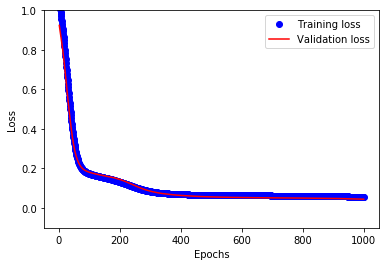

In [18]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((-0.1,1))
plt.legend()
plt.show()

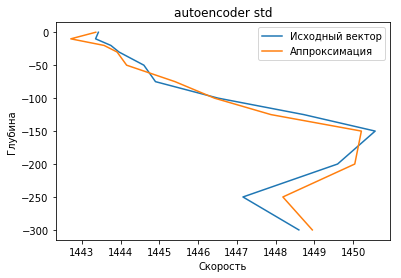

In [93]:
n = 7
test = CZ_test[n]
predict_std = autoencoder_std.predict(CZ_test_std[n:n+1])
predict = scaler.inverse_transform(predict_std)
plot_ssp(test, predict[0], zs, 'autoencoder std')

In [33]:
import pylab

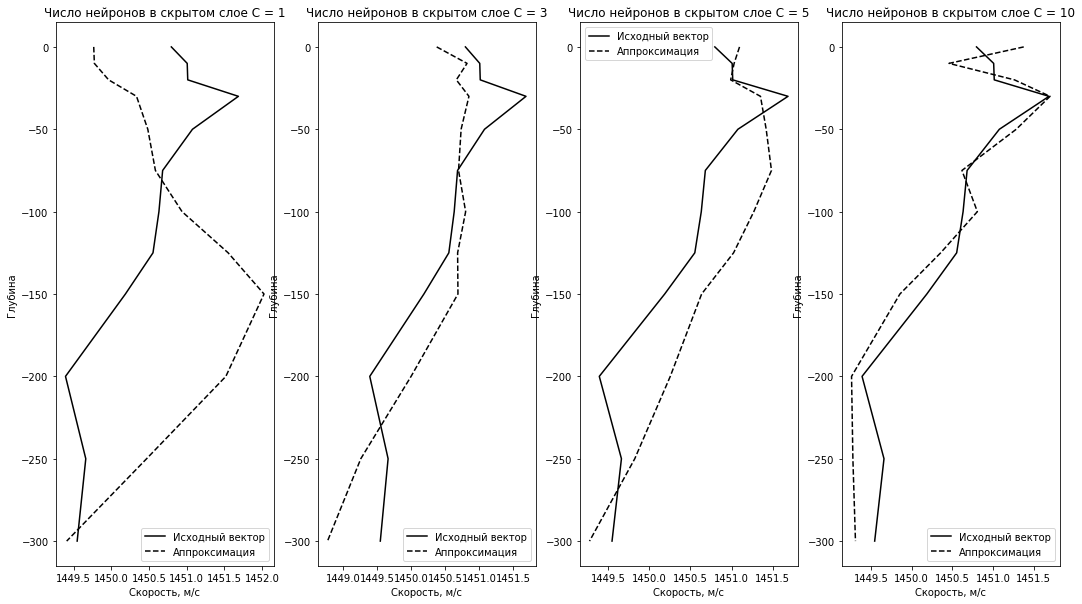

In [34]:
nc = [1, 3, 5, 10]
mse = []
i = 1
plt.figure(figsize=(18,10))
for nco in nc:
    autoencoder_std, encoder_std = AEncoder(N_cord, nco)
    scaler = StandardScaler()
    CZ_train_std = scaler.fit_transform(CZ_train)
    CZ_test_std = scaler.fit_transform(CZ_test)
    hist = autoencoder_std.fit(CZ_train_std, CZ_train_std,
                epochs=1000,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test_std, CZ_test_std),verbose=0)

    predict_std = autoencoder_std.predict(CZ_test_std)
    predict = scaler.inverse_transform(predict_std)
    
    pylab.subplot(1, 4,i)
    pylab.plot(CZ_test[4], zs, c='k')
    pylab.plot(predict[4], zs,'k--', c='k')
    mse.append(mean_squared_error(CZ_test[4], predict[4]))
    pylab.legend(['Исходный вектор', 'Аппроксимация'])
    pylab.ylabel('Глубина')
    pylab.xlabel('Скорость, м/с')
    plt.title('Число нейронов в скрытом слое С = {}'.format(nco))
    i += 1
pylab.show()

In [97]:
mse

[0.43453394221509506,
 0.8083710595600325,
 0.37250103331905376,
 0.09665038043785533]

**сравнение с PCA**

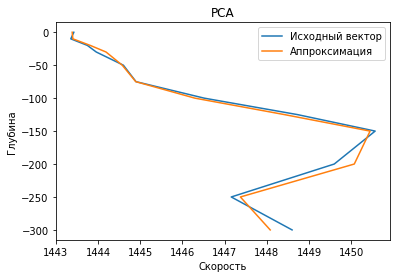

In [98]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(CZ_train)
CZ_reconstructed_pca = pca.inverse_transform(pca.transform(CZ_test))
reduced = CZ_reconstructed_pca
plot_ssp(CZ_test[n], reduced[n], zs, 'PCA')

## Сжатие в размерность 2

In [99]:
autoencoder_2dim, encoder_2dim = AEncoder(N_cord, 2)

In [100]:
hist = autoencoder_2dim.fit(CZ_train_std, CZ_train_std,
                epochs=500,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test_std, CZ_test_std))

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 3s 28ms/step - loss: 10.3921 - val_loss: 9.8572
Epoch 2/500
120/120 [==============================] - 0s 100us/step - loss: 9.8946 - val_loss: 9.3841
Epoch 3/500
120/120 [==============================] - 0s 93us/step - loss: 9.4201 - val_loss: 8.9367
Epoch 4/500
120/120 [==============================] - 0s 77us/step - loss: 8.9785 - val_loss: 8.5157
Epoch 5/500
120/120 [==============================] - 0s 74us/step - loss: 8.5377 - val_loss: 8.1202
Epoch 6/500
120/120 [==============================] - 0s 77us/step - loss: 8.1453 - val_loss: 7.7462
Epoch 7/500
120/120 [==============================] - 0s 84us/step - loss: 7.7636 - val_loss: 7.3944
Epoch 8/500
120/120 [==============================] - 0s 81us/step - loss: 7.4093 - val_loss: 7.0630
Epoch 9/500
120/120 [==============================] - 0s 79us/step - loss: 7.0783 - val_loss: 6.7510
Epoch 10/500
120/120 [=============

120/120 [==============================] - 0s 77us/step - loss: 0.3269 - val_loss: 0.3003
Epoch 160/500
120/120 [==============================] - 0s 79us/step - loss: 0.3233 - val_loss: 0.2966
Epoch 161/500
120/120 [==============================] - 0s 79us/step - loss: 0.3198 - val_loss: 0.2929
Epoch 162/500
120/120 [==============================] - 0s 80us/step - loss: 0.3164 - val_loss: 0.2894
Epoch 163/500
120/120 [==============================] - 0s 83us/step - loss: 0.3130 - val_loss: 0.2859
Epoch 164/500
120/120 [==============================] - 0s 77us/step - loss: 0.3096 - val_loss: 0.2825
Epoch 165/500
120/120 [==============================] - 0s 83us/step - loss: 0.3063 - val_loss: 0.2792
Epoch 166/500
120/120 [==============================] - 0s 79us/step - loss: 0.3031 - val_loss: 0.2760
Epoch 167/500
120/120 [==============================] - 0s 77us/step - loss: 0.3001 - val_loss: 0.2728
Epoch 168/500
120/120 [==============================] - 0s 82us/step - loss: 

Epoch 238/500
120/120 [==============================] - 0s 66us/step - loss: 0.1966 - val_loss: 0.1633
Epoch 239/500
120/120 [==============================] - 0s 79us/step - loss: 0.1960 - val_loss: 0.1627
Epoch 240/500
120/120 [==============================] - 0s 77us/step - loss: 0.1955 - val_loss: 0.1620
Epoch 241/500
120/120 [==============================] - 0s 75us/step - loss: 0.1950 - val_loss: 0.1615
Epoch 242/500
120/120 [==============================] - 0s 77us/step - loss: 0.1945 - val_loss: 0.1609
Epoch 243/500
120/120 [==============================] - 0s 68us/step - loss: 0.1940 - val_loss: 0.1603
Epoch 244/500
120/120 [==============================] - 0s 83us/step - loss: 0.1935 - val_loss: 0.1597
Epoch 245/500
120/120 [==============================] - 0s 69us/step - loss: 0.1930 - val_loss: 0.1592
Epoch 246/500
120/120 [==============================] - 0s 74us/step - loss: 0.1925 - val_loss: 0.1587
Epoch 247/500
120/120 [==============================] - 0s 69us

Epoch 395/500
120/120 [==============================] - 0s 70us/step - loss: 0.1696 - val_loss: 0.1300
Epoch 396/500
120/120 [==============================] - 0s 72us/step - loss: 0.1695 - val_loss: 0.1299
Epoch 397/500
120/120 [==============================] - 0s 79us/step - loss: 0.1695 - val_loss: 0.1299
Epoch 398/500
120/120 [==============================] - 0s 68us/step - loss: 0.1694 - val_loss: 0.1298
Epoch 399/500
120/120 [==============================] - 0s 80us/step - loss: 0.1694 - val_loss: 0.1297
Epoch 400/500
120/120 [==============================] - 0s 72us/step - loss: 0.1693 - val_loss: 0.1297
Epoch 401/500
120/120 [==============================] - 0s 75us/step - loss: 0.1693 - val_loss: 0.1296
Epoch 402/500
120/120 [==============================] - 0s 73us/step - loss: 0.1692 - val_loss: 0.1295
Epoch 403/500
120/120 [==============================] - 0s 71us/step - loss: 0.1692 - val_loss: 0.1295
Epoch 404/500
120/120 [==============================] - 0s 74us

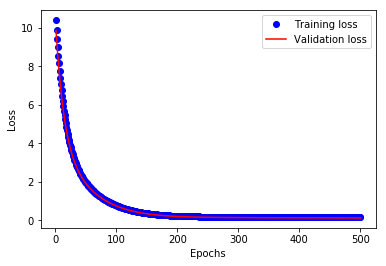

In [102]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim((min(acc_values)-5,200))
plt.legend()
plt.show()

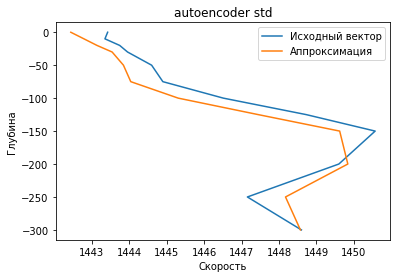

In [103]:
n = 7
test = CZ_test[n]
predict_std = autoencoder_2dim.predict(CZ_test_std[n:n+1])
predict = scaler.inverse_transform(predict_std)
plot_ssp(test, predict[0], zs, 'autoencoder std')

**Представление на плоскости**

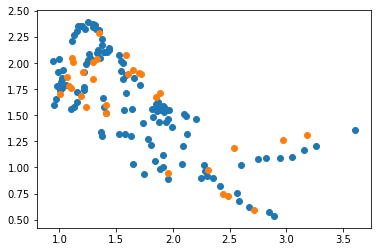

In [104]:
train_embedding = encoder_2dim.predict(CZ_train_std)
test_embedding = encoder_2dim.predict(CZ_test_std)
plt.scatter(train_embedding[:,0], train_embedding[:,1])
plt.scatter(test_embedding[:,0], test_embedding[:,1])
plt.show()

## Зависимость ошибки от размености представления

In [38]:
kf = KFold(n_splits=5)
scaler = StandardScaler()
MSEmean = []
std_mean = []
Dim = list(range(1, N_cord+1))
for dim in Dim:
    autoencoder, encoder = AEncoder(N_cord, dim)
    MSE = []
    for train, test in kf.split(CZ):
        CZ_train, CZ_test = CZ[train], CZ[test]
        CZ_train_std = scaler.fit_transform(CZ_train)
        CZ_test_std = scaler.transform(CZ_test)
        
        autoencoder.fit(CZ_train_std, CZ_train_std, epochs=200,batch_size=64, shuffle=True, verbose=0)
        predict = autoencoder.predict(CZ_test_std)
        predict = scaler.inverse_transform(predict)
        mse = mean_squared_error(CZ_test, predict)
        MSE.append(mse)
    MSEmean.append(np.mean(MSE))
    std_mean.append(np.std(MSE))
    
MSEmean = np.array(MSEmean)
std_mean = np.array(std_mean)

In [49]:
CV, CV1, CV2 = [], [], []
X = range(1,N_cord+1)
for i in range(1,N_cord+1):
    CV.append(np.mean(my_cross_val_score(CZ, n_comp = i, model = 'pca')))
    CV1.append(np.mean(my_cross_val_score(CZ, n_comp = i, model = 'k_means')))
CV2 = [np.mean(my_cross_val_score(CZ, n_comp = i, model = 'k_svd')) for i in range(2,N_cord)]

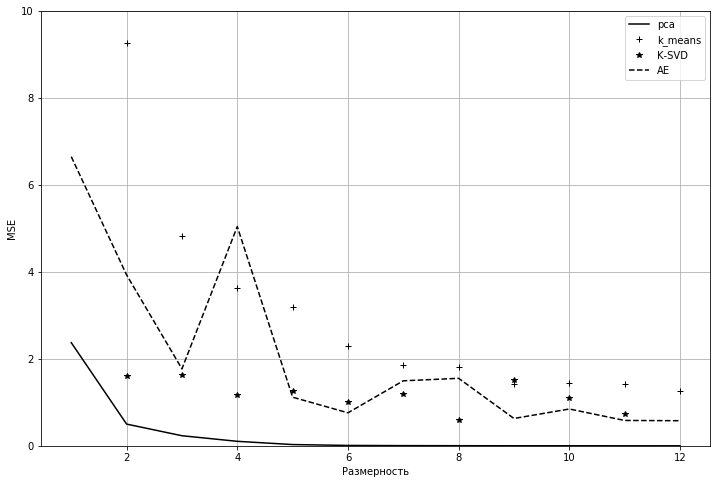

In [53]:
plt.figure(figsize=(12,8))
plt.plot(X,CV, 'k')
plt.plot(X,CV1, '+', c='k')
plt.plot(range(2,N_cord), CV2, '*' 'k')
plt.plot(Dim, MSEmean, 'k--')
plt.legend(['pca', 'k_means', 'K-SVD', 'AE'])
plt.ylabel('MSE')
plt.xlabel('Размерность')
plt.grid(True)
plt.ylim(0,10)
plt.show()